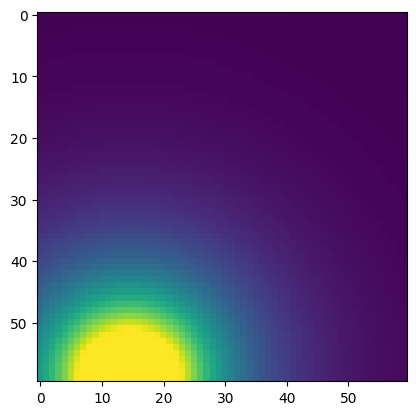

In [1]:
%reload_ext autoreload
%autoreload 2

# import sys
import numpy as np
# numpy.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold= np.inf)

from Grid import Grid, Point
from Engine import Engine
import initial_states



init_config_tip_follows_attractor = { #'stalk_cells': initial_states.Stalk_pres,
                                    'tip_cells': [Point(14,14)],
                                    'attractor_cells': initial_states.Attractors_small3
                                        }
init_config_stalk_row = {'stalk_cells': initial_states.Stalk_pres,
                                    #'tip_cells': [Point(15,15)],
                                    #'tip_cells': [Point(2,2), Point(2,28)],
                                    'attractor_cells': initial_states.Attractors_small3
                                }

                                    
init_config_stalk_middle = {#'stalk_cells': initial_states.Stalk_pres,
                        'stalk_cells': initial_states.Stalk_pres_mid,
                #'tip_cells': [Point(2,2), Point(2,28), Point(14,2), Point(14,28)],
                # 'tip_cells': [Point(35,2), Point(35,58), Point(35,45), Point(35,40), Point(35,34)],
                #'tip_cells': [Point(35, y) for y in range(15,58, 9)],
               'attractor_cells': initial_states.Attractors_small4
               }



grid1 = Grid(width=30, height=30, init_config=init_config_tip_follows_attractor)
grid2 = Grid(width=30, height=30, init_config=init_config_stalk_row)
grid3 = Grid(width=60, height=60, init_config=init_config_stalk_middle) #* Final result






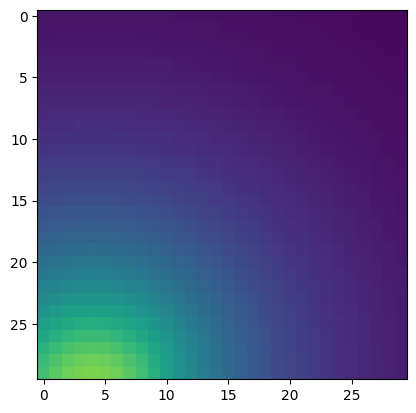

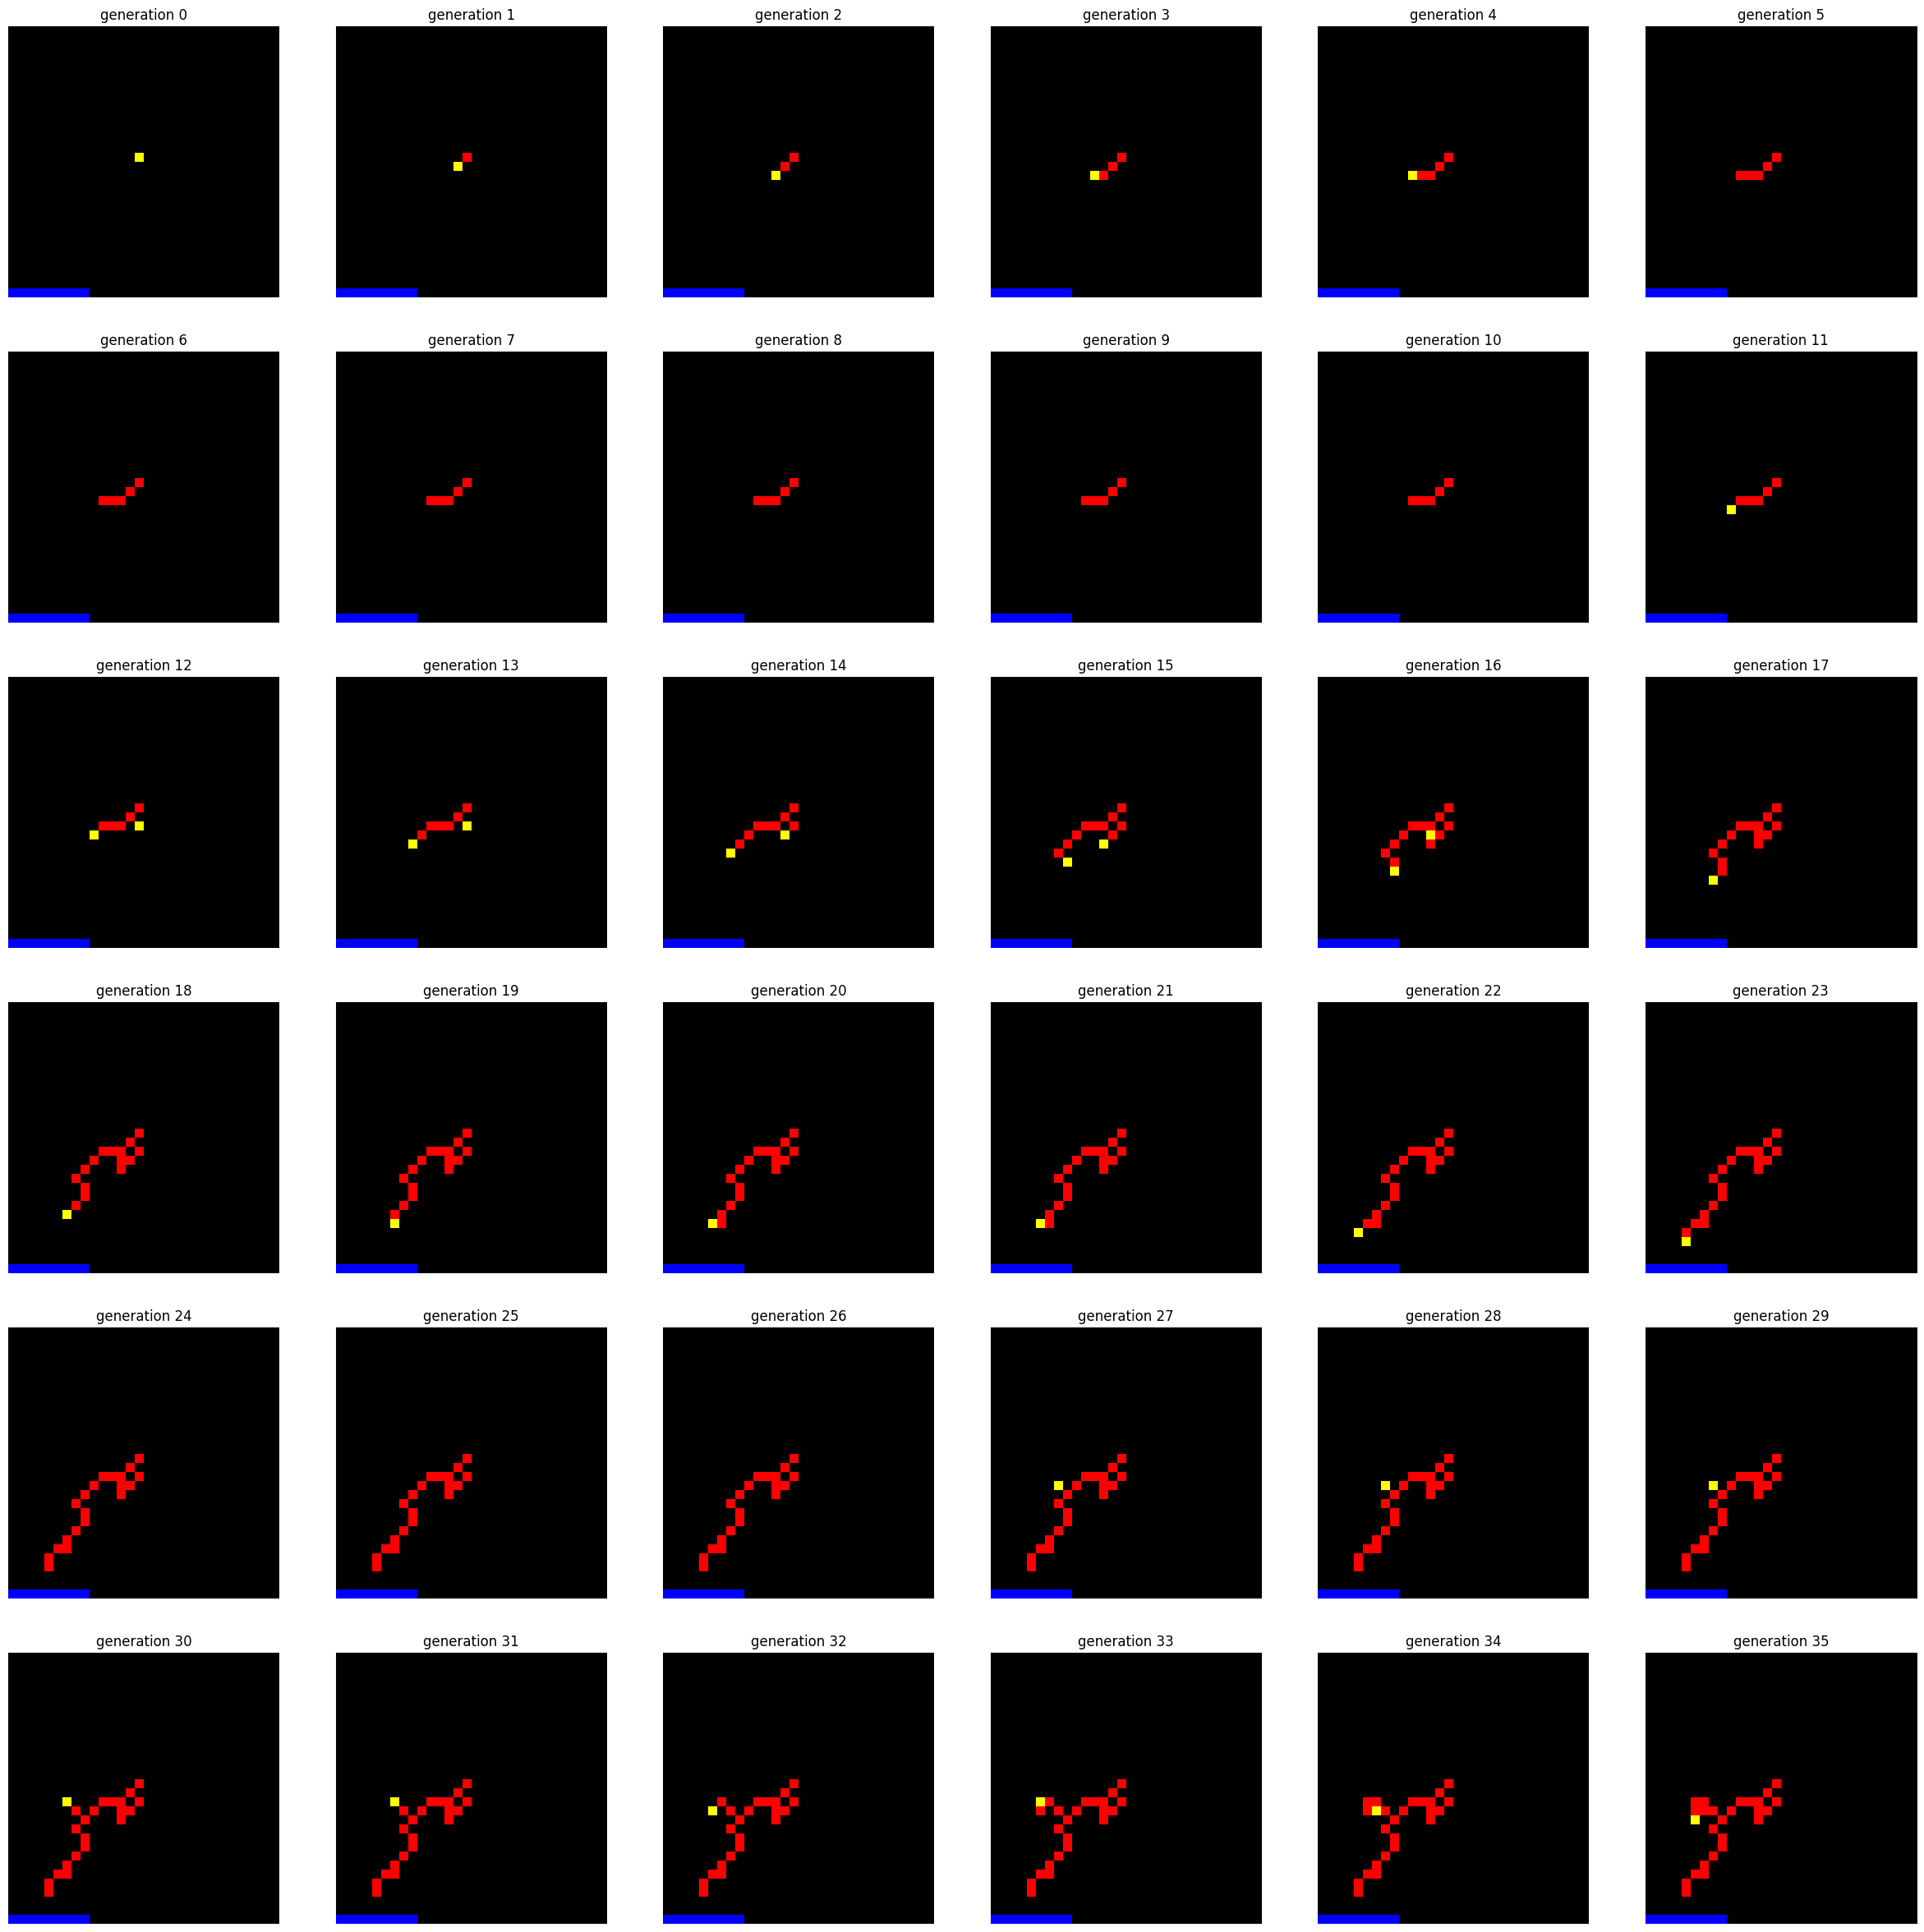

In [2]:
engine1 = Engine(init_grid=grid1, generations=36)

engine1.run()

engine1.visualize()


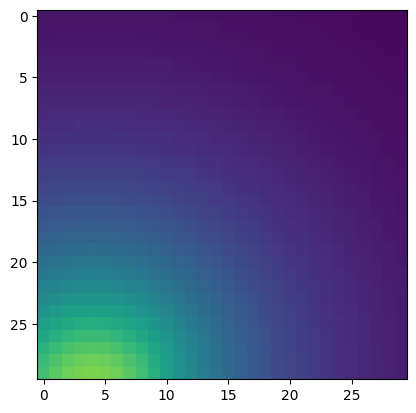

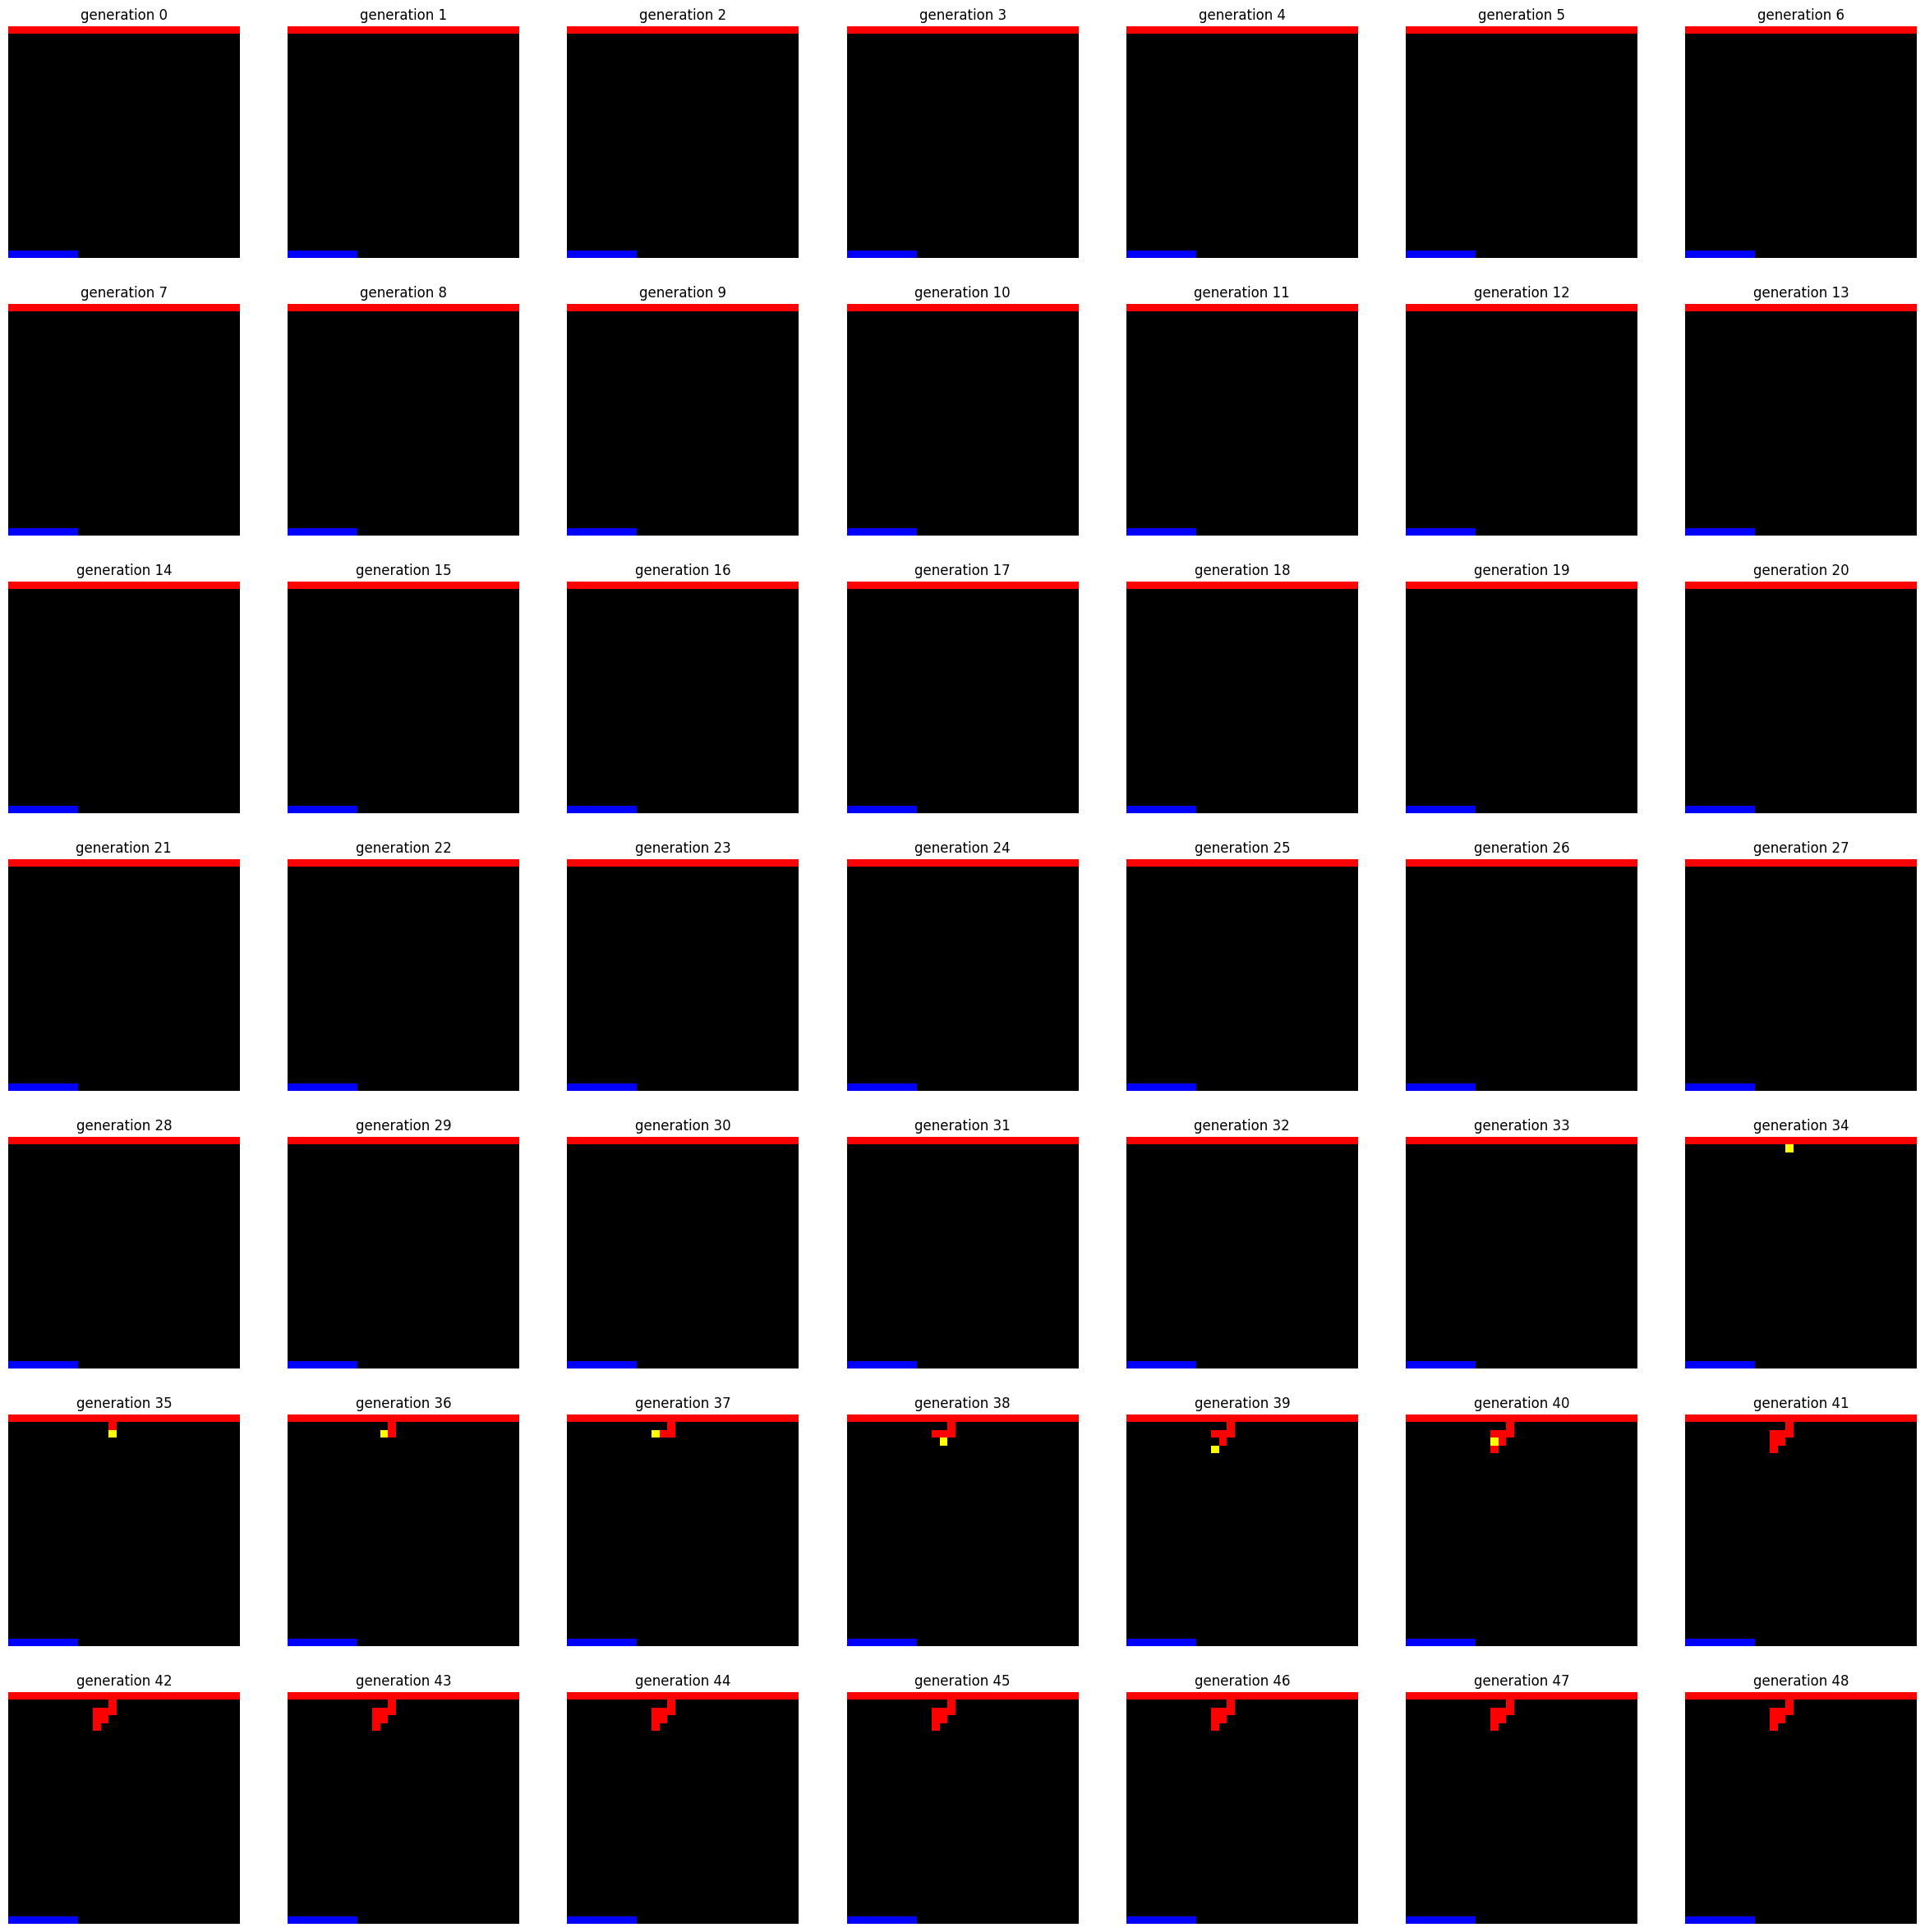

In [3]:
engine2 = Engine(init_grid=grid2, generations=49)
engine2.run()
engine2.visualize()

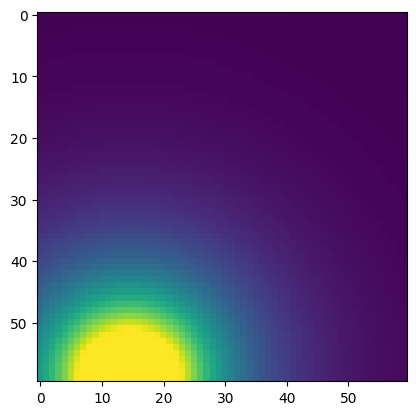

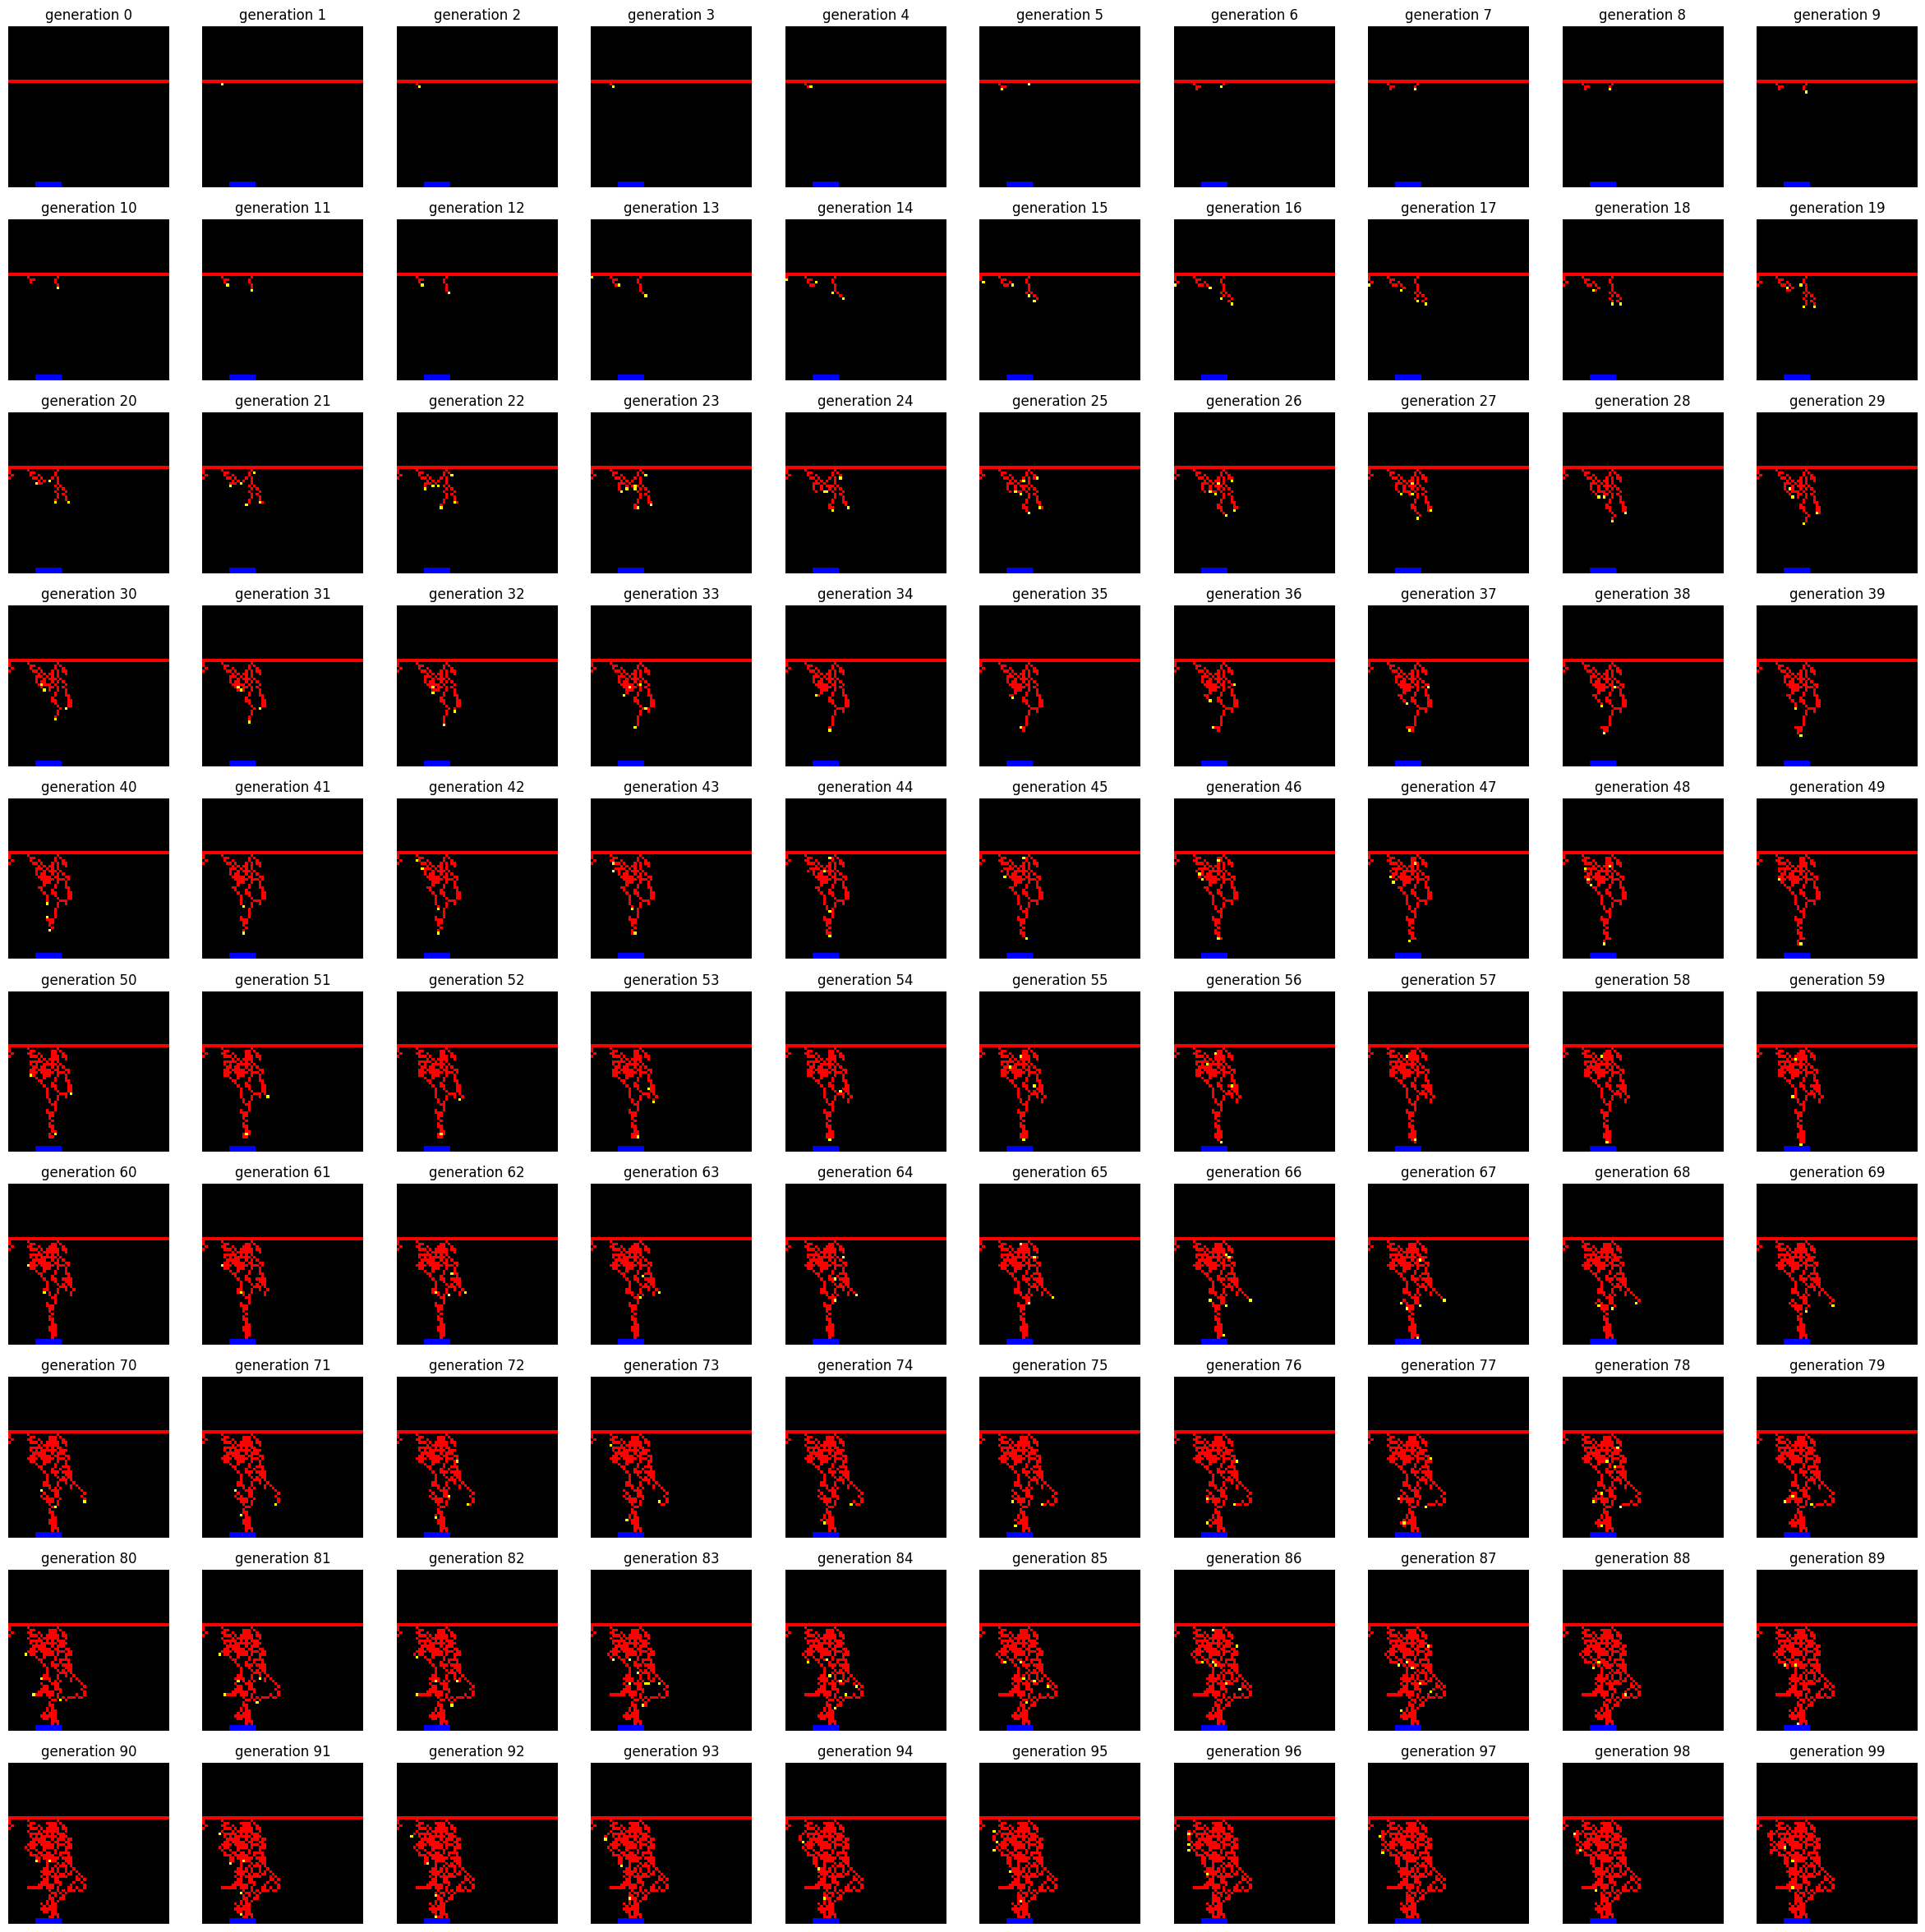

In [4]:
generations3 = 100
engine3 = Engine(init_grid=grid3, generations=generations3)

engine3.run()

engine3.visualize()



In [5]:
stats = engine3.get_stats()
import matplotlib.colors as mcolors
colors = [(0,0,0), (1,0.5,0), (1,0,0), (0,0,1)]
cmap = mcolors.ListedColormap(colors)

stats_cells = stats.num_cell_history
stats_tips = stats.num_tip_history
stats_stalks = stats.num_stalk_history

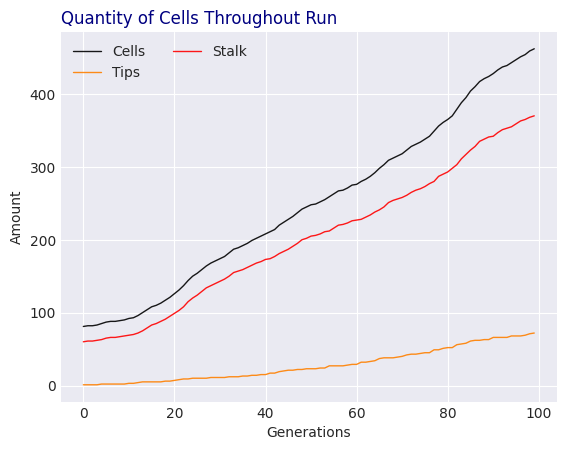

In [6]:

# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'Generations': range(0,generations3), 'Cells': stats_cells, 'Tips': stats_tips, 'Stalk': stats_stalks})
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = cmap
 
# Plot multiple lines
num=0
for column in df.drop('Generations', axis=1):
    plt.plot(df['Generations'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
    num+=1

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Quantity of Cells Throughout Run", loc='left', fontsize=12, fontweight=0, color='navy')
plt.xlabel("Generations")
plt.ylabel("Amount")

# Show the graph
plt.show()

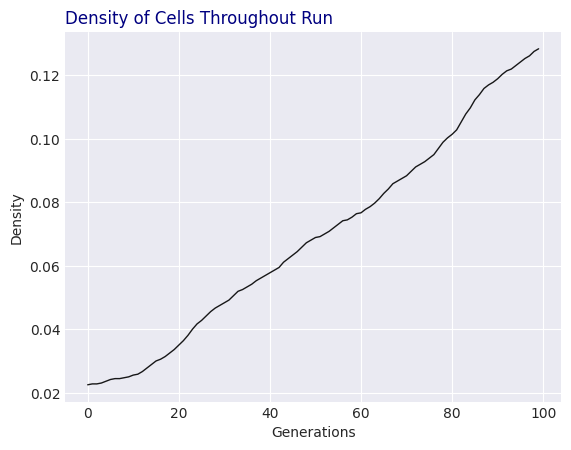

In [7]:
density_history = stats.num_cell_history / grid3.get_area()
plt.plot(range(generations3), density_history, marker='', color=palette(0), linewidth=1, alpha=0.9)

# Add titles
plt.title("Density of Cells Throughout Run", loc='left', fontsize=12, fontweight=0, color='navy')
plt.xlabel("Generations")
plt.ylabel("Density")

# Show the graph
plt.show()

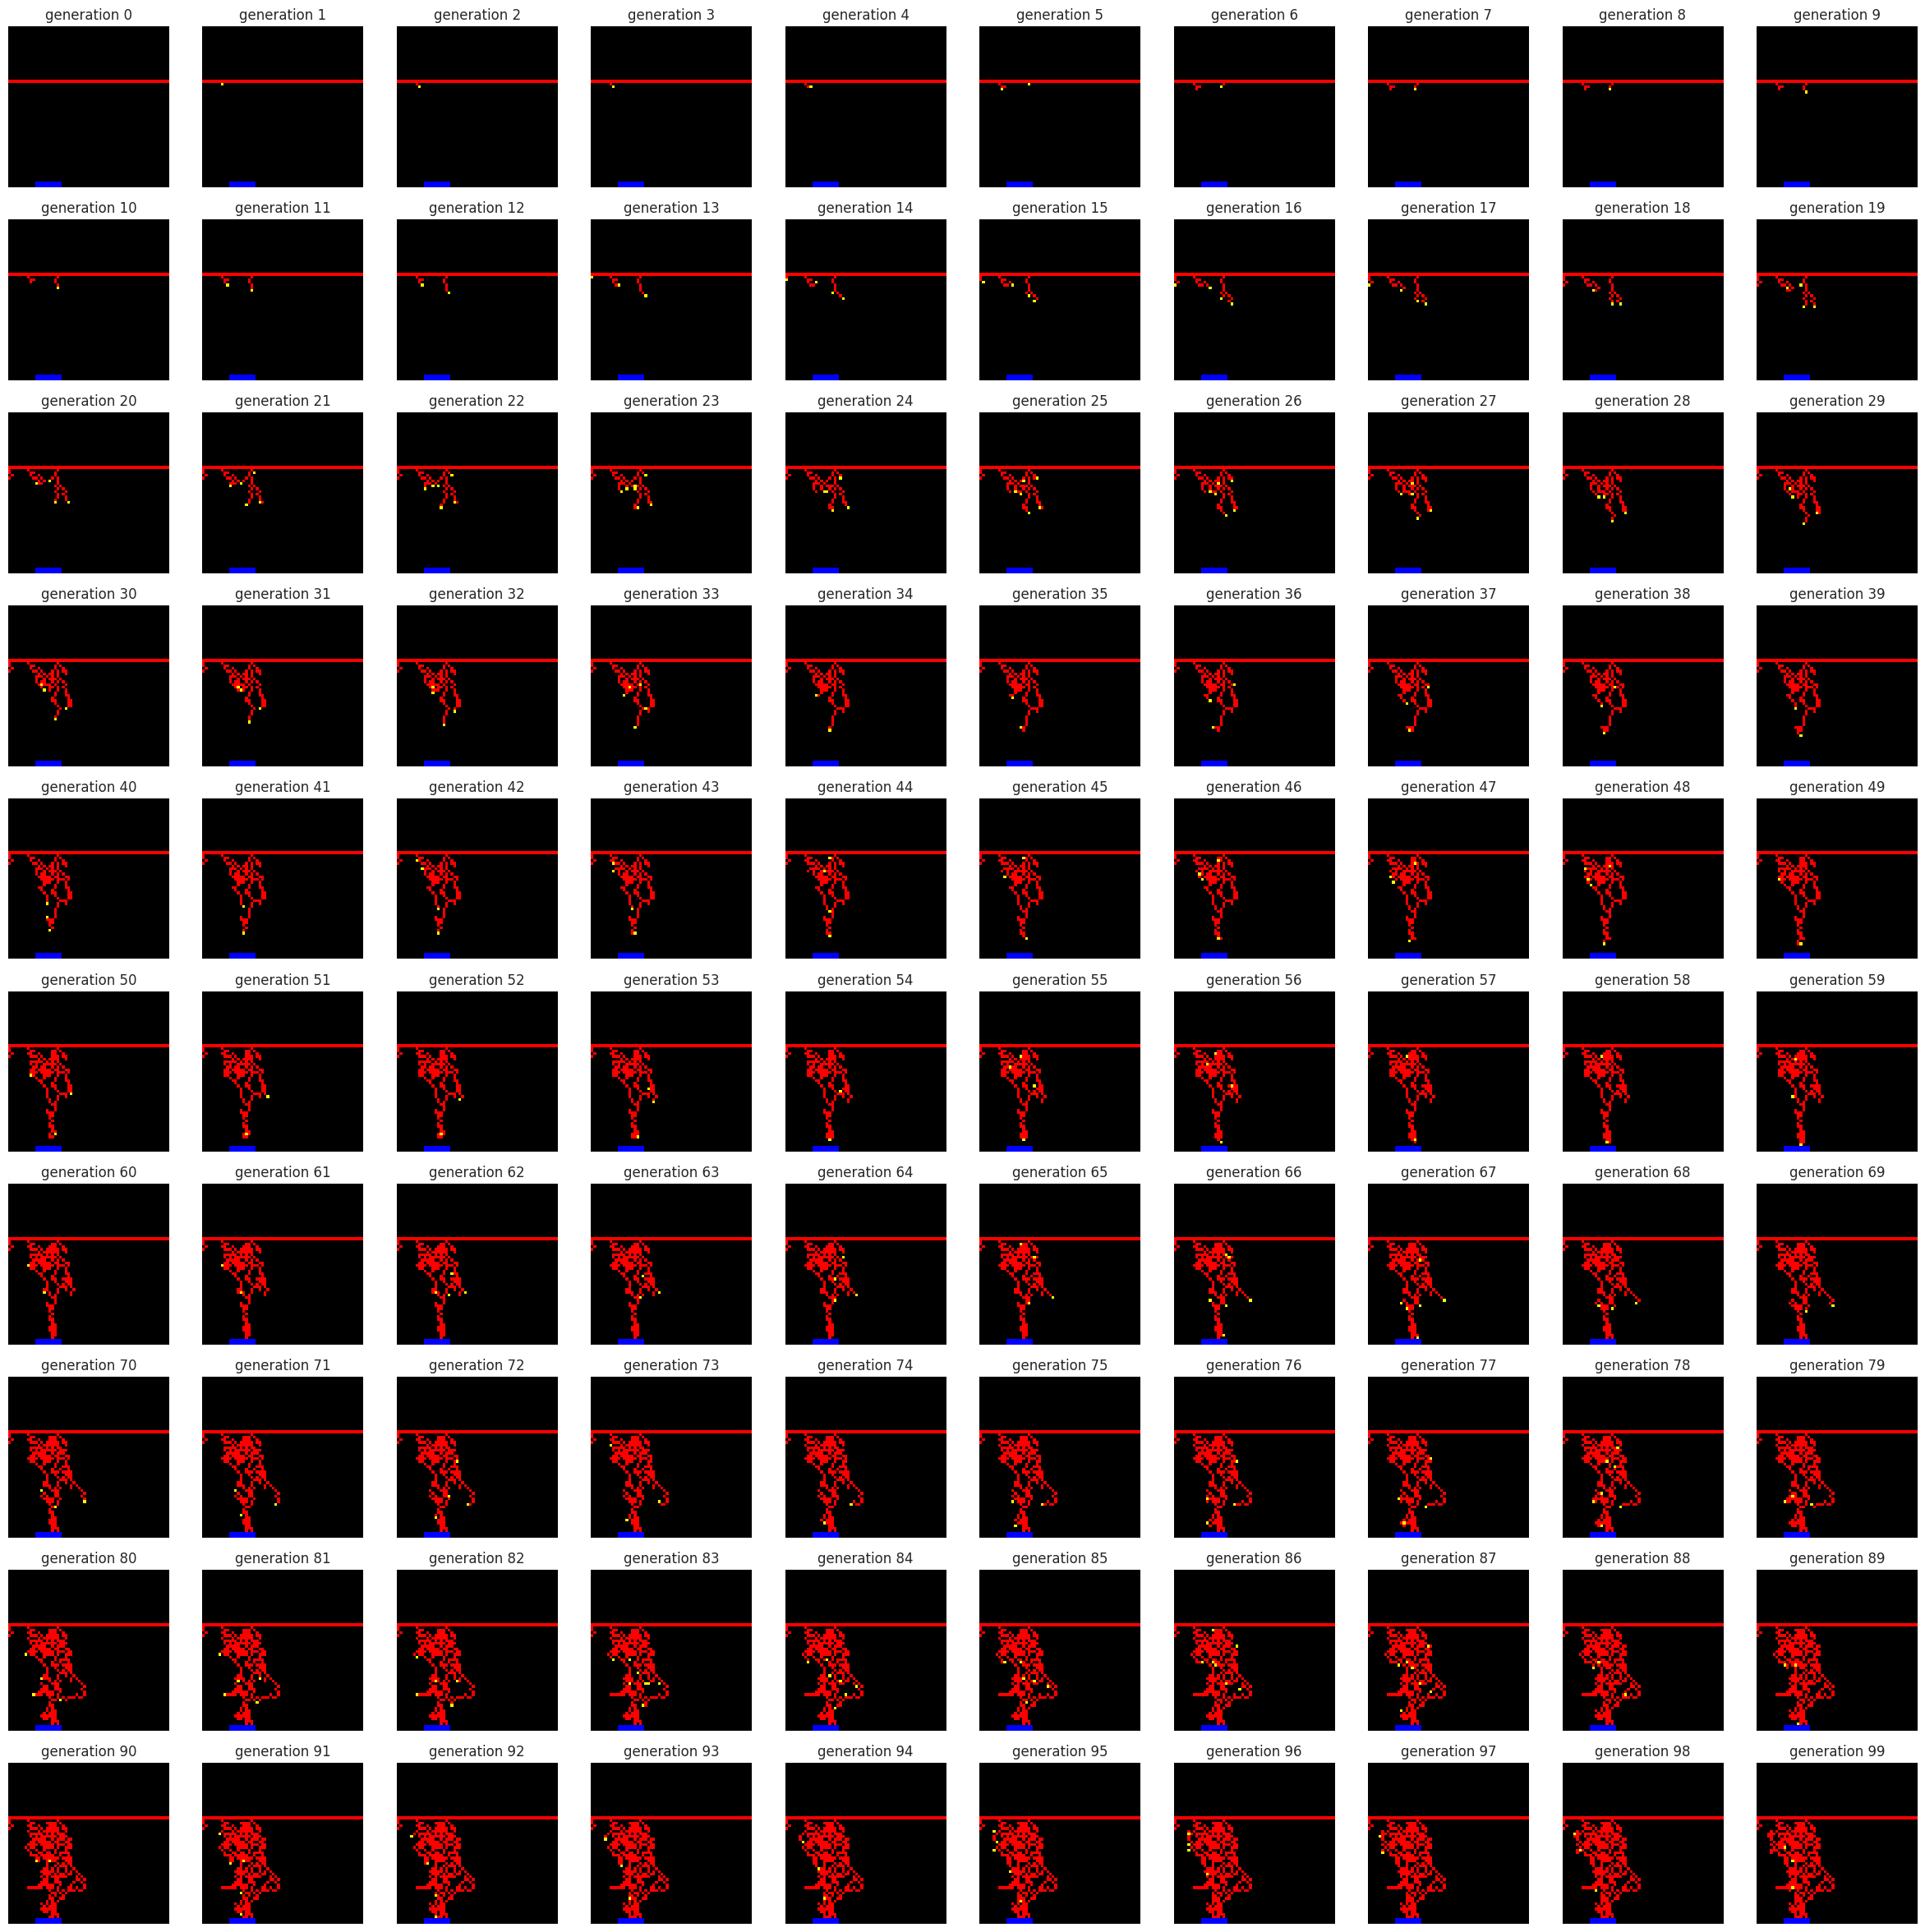

In [24]:
engine3.visualize()